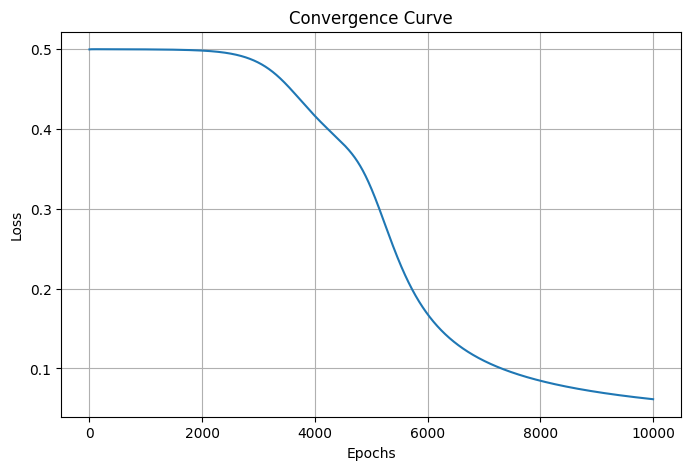

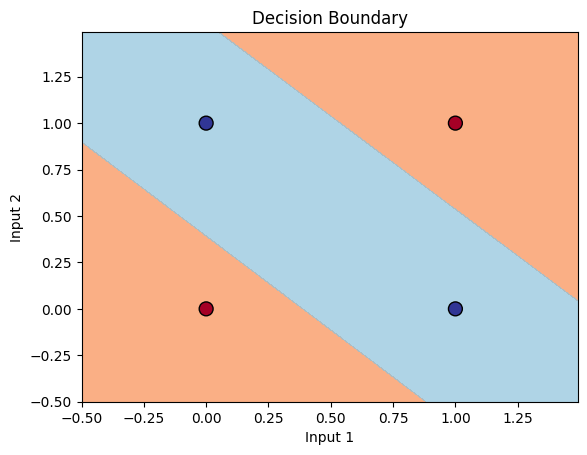

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function: Step function for the McCulloch-Pitts neuron
def step_function(x):
    return np.where(x >= 0, 1, 0)

# XOR truth table inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Weights for hidden layer and output layer
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))  # (2, 2)
bh = np.random.uniform(size=(1, hidden_layer_neurons))  # (1, 2)
wout = np.random.uniform(size=(hidden_layer_neurons, output_neurons))  # (2, 1)
bout = np.random.uniform(size=(1, output_neurons))  # (1, 1)

# Learning rate and number of epochs
lr = 0.1
epochs = 10000

# Sigmoid function and its derivative for backpropagation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the XOR network using backpropagation
loss_history = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, wh) + bh
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, wout) + bout
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - predicted_output
    loss = np.mean(np.abs(error))
    loss_history.append(loss)

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(wout.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    wout += hidden_layer_output.T.dot(d_predicted_output) * lr
    bout += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    wh += X.T.dot(d_hidden_layer) * lr
    bh += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

# Plotting loss over epochs (convergence curve)
plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title('Convergence Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Decision boundary visualization
def plot_decision_boundary(X, wh, bh, wout, bout):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z_hidden = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], wh) + bh)
    Z = sigmoid(np.dot(Z_hidden, wout) + bout)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, cmap="RdYlBu")
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=100, edgecolors='k', cmap="RdYlBu")
    plt.title('Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

plot_decision_boundary(X, wh, bh, wout, bout)
